In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from adjustText import adjust_text

In [3]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/finemap_v3_backup_teresa/'
susie = pd.read_csv(path + 'bellenguez_remove_index0_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_remove_index0_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_remove_index0_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_remove_index0_omics_dl.txt', sep = '\t')

In [4]:
susie['source'] = 'susie'
baseline['source'] = 'baseline'
omics['source'] = 'omics'
dl['source'] = 'dl'

all_snp = pd.concat([susie, baseline, omics, dl], ignore_index=True)

In [6]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
bin_labels = ["0" ,"0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
all_snp['PIP_Category'] = pd.cut(all_snp['PIP'], bins=bins, labels=bin_labels, include_lowest=True)

import math
all_snp['-logp'] = -np.log10(all_snp['P'])

In [7]:
all_snp.source.value_counts()

susie       2529
baseline    1790
omics       1665
dl          1630
Name: source, dtype: int64

In [8]:
def plot_facet(df, x, y, color, title, palette = 'coolwarm'):
    g = sns.FacetGrid(df, col='source', col_wrap=2, height=4, aspect=1.5)
    g.map_dataframe(sns.scatterplot, x= x, y=y, hue=color, palette= palette, s=20)

    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title ,fontweight='bold',size=15)
    
    
    source_counts = df['source'].value_counts()
    counts_dict = {src: f'{count}' for src, count in source_counts.items()}

    for ax in g.axes.flat:
        # Extract the column name from the existing title
        col_name = ax.get_title().split('=')[-1].strip()
        # Get the count string from the dictionary
        count_str = counts_dict.get(col_name, "")
        # Update the title with the count
        ax.set_title(f'{col_name}: {count_str} SNPs', size=15)

        
    ## set color legend
    if (df[color].dtypes == 'float'):
        norm = plt.Normalize(vmin=df[color].min(), vmax=df[color].max())
        sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
        sm.set_array([])


        cbar = plt.colorbar(sm, ax=g.axes, orientation='vertical', pad=0.02, aspect=40, fraction=0.02)
        cbar.set_label(color, rotation=270, labelpad=10)
    else:
        g.add_legend(title=color, title_fontsize='13', fontsize='10', bbox_to_anchor=(1.005, 0.5), loc='center left')
    plt.savefig('/gpfs/commons/home/tlin/pic/PRS/AUG_' + title + '.pdf',transparent=True,bbox_inches='tight')
    plt.show()

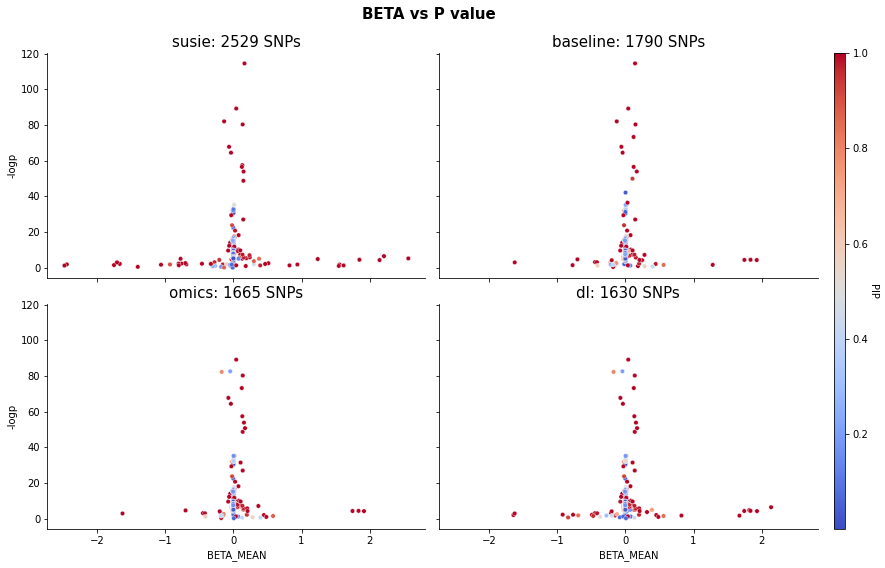

In [10]:
plot_facet(all_snp, 'BETA_MEAN','-logp', 'PIP','BETA vs P value')

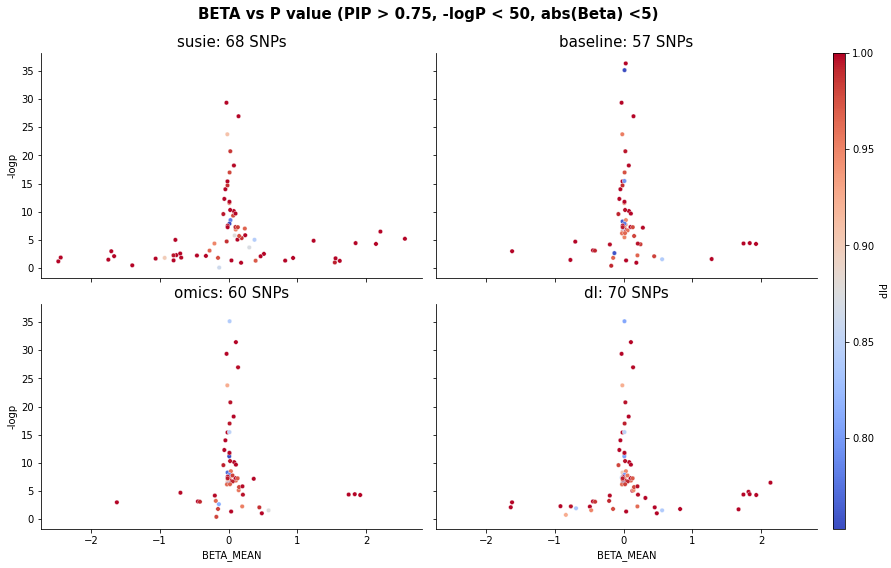

In [11]:
snp_pip_thres = all_snp[(all_snp.PIP> 0.75) & (all_snp['-logp'] < 40) & (abs(all_snp['BETA_MEAN']) < 5)]
plot_facet(snp_pip_thres, 'BETA_MEAN','-logp', 'PIP','BETA vs P value (PIP > 0.75, -logP < 50, abs(Beta) <5)')


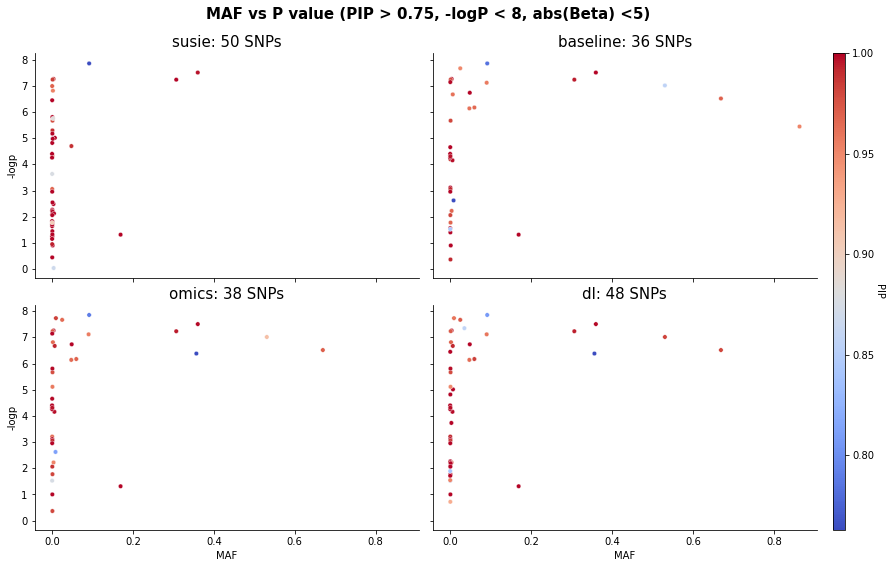

In [12]:
## CHECK THE MAF for those that's not significant at all
snp_maf_check = snp_pip_thres[snp_pip_thres['-logp'] < 8]
plot_facet(snp_maf_check , 'MAF','-logp', 'PIP','MAF vs P value (PIP > 0.75, -logP < 8, abs(Beta) <5)')

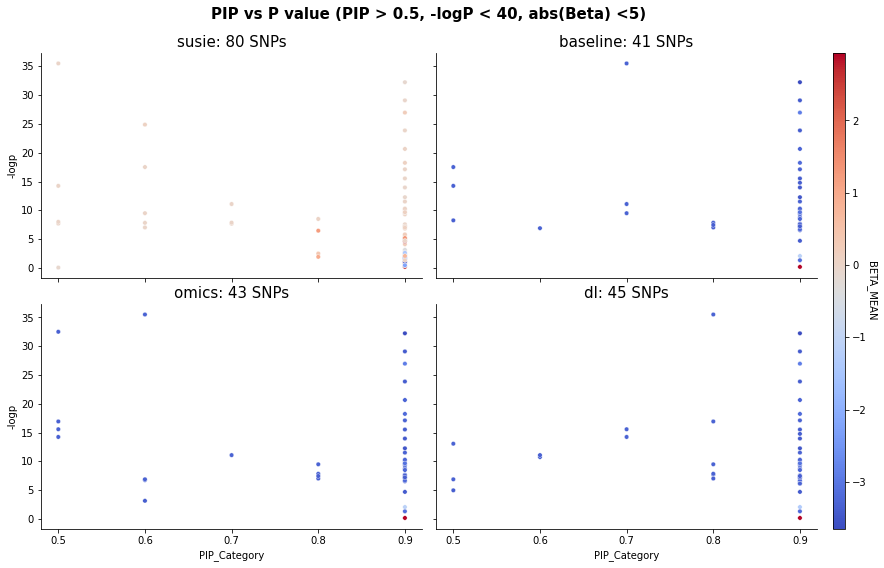

In [236]:
all_snp_no_outlier = all_snp[(abs(all_snp.BETA_MEAN) <5) & (all_snp['-logp'] <40)&(all_snp.PIP > 0.5)]
plot_facet(all_snp_no_outlier, 'PIP_Category','-logp', 'BETA_MEAN','PIP vs P value (PIP > 0.5, -logP < 40, abs(Beta) <5)')


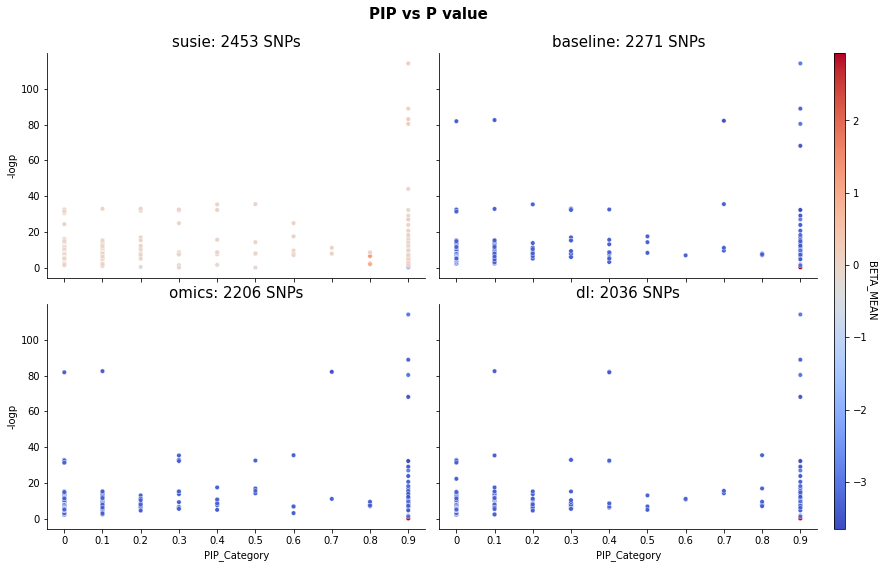

In [237]:
all_snp_no_outlier = all_snp[abs(all_snp.BETA_MEAN) <5]
plot_facet(all_snp_no_outlier, 'PIP_Category','-logp', 'BETA_MEAN','PIP vs P value')



In [261]:
#199
filter_snp = all_snp[all_snp.PIP > 0.75]
len(filter_snp[filter_snp.PIP > 0.75].CREDIBLE_SET.unique())

89

In [388]:
check = filter_snp[filter_snp.CREDIBLE_SET.duplicated(keep = False)].reset_index(drop=True)
check

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,source,SNPVAR,-logp,PIP_Category
0,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,susie,NaN,0.167249,0.9
1,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2,susie,NaN,32.247912,0.9
2,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1,susie,NaN,10.104770,0.9
3,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1,susie,NaN,88.882136,0.9
4,rs10933431,2,233117202,G,C,0.2343,282331,8.606060,7.561430e-18,0.987818,0.016862,0.002983,chr2:232000001-235000001:1,susie,NaN,17.121396,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,rs200538373,19,1061893,G,C,0.0039,279337,6.349800,2.155950e-10,0.999972,0.122305,0.016117,chr19:1-3000001:2,dl,1.273100e-08,9.666361,0.9
148,rs4147933,19,1064566,A,G,0.0408,282331,-4.264300,2.005300e-05,0.991928,-0.027620,0.005600,chr19:1-3000001:3,dl,1.184300e-07,4.697821,0.9
149,rs365653,19,44858389,A,G,0.1082,282331,-17.534000,7.882410e-69,0.999999,-0.056903,0.003249,chr19:43000001-46000001:3,dl,4.686900e-08,68.103341,0.9
150,rs79701229,19,44881674,G,A,0.0140,281838,19.073000,4.233090e-81,1.000000,0.161091,0.008592,chr19:43000001-46000001:2,dl,1.747000e-08,80.373342,0.9


In [290]:
value_count = check.CREDIBLE_SET.value_counts()
print(value_count)
value_index = value_counts[value_counts == 4].index


chr2:232000001-235000001:1     4
chr11:59000001-62000001:1      4
chr19:43000001-46000001:3      4
chr11:120000001-123000001:2    4
chr17:44000001-47000001:1      4
chr10:10000001-13000001:1      4
chr11:120000001-123000001:1    4
chr19:1-3000001:1              4
chr2:126000001-129000001:1     4
chr15:48000001-51000001:1      4
chr15:48000001-51000001:2      4
chr19:43000001-46000001:1      4
chr6:39000001-42000001:1       4
chr7:142000001-145000001:1     4
chr19:1-3000001:3              4
chr19:43000001-46000001:2      4
chr14:38000001-41000001:1      4
chr17:44000001-47000001:3      4
chr17:44000001-47000001:2      4
chr6:40000001-43000001:2       4
chr19:1-3000001:2              4
chr16:80000001-83000001:1      4
chr1:206000001-209000001:2     4
chr1:206000001-209000001:1     4
chr4:58000001-61000001:1       4
chr17:48000001-51000001:1      4
chr8:143000001-146000001:1     4
chr15:62000001-65000001:1      4
chr2:104000001-107000001:1     4
chr3:154000001-157000001:1     3
chr11:8500

In [296]:
check[check.CREDIBLE_SET.isin(value_index)].source.value_counts()

baseline    29
dl          29
omics       29
susie       29
Name: source, dtype: int64

In [393]:
check['credible_set'] = check.CREDIBLE_SET.str.rsplit(":",1).str[0] ## doesn't care about the index 
check['finemap_bp'] = check.CREDIBLE_SET.str.rsplit(":",2).str[1].str.rsplit('-')
check['finemap_bp'] = check['finemap_bp'].apply(lambda x: list(map(int, x)))
check['finemap_bp'] = check['finemap_bp'].apply(lambda x: int(sum(x) / len(x)))

In [314]:
check[check.credible_set.isin(check['credible_set'].unique())] #28

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,source,SNPVAR,-logp,PIP_Category,credible_set
0,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,susie,NaN,0.167249,0.9,chr1:206000001-209000001
1,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2,susie,NaN,32.247912,0.9,chr1:206000001-209000001
2,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1,susie,NaN,10.104770,0.9,chr2:104000001-107000001
3,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1,susie,NaN,88.882136,0.9,chr2:126000001-129000001
4,rs10933431,2,233117202,G,C,0.2343,282331,8.606060,7.561430e-18,0.987818,0.016862,0.002983,chr2:232000001-235000001:1,susie,NaN,17.121396,0.9,chr2:232000001-235000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,rs200538373,19,1061893,G,C,0.0039,279337,6.349800,2.155950e-10,0.999972,0.122305,0.016117,chr19:1-3000001:2,dl,1.273100e-08,9.666361,0.9,chr19:1-3000001
148,rs4147933,19,1064566,A,G,0.0408,282331,-4.264300,2.005300e-05,0.991928,-0.027620,0.005600,chr19:1-3000001:3,dl,1.184300e-07,4.697821,0.9,chr19:1-3000001
149,rs365653,19,44858389,A,G,0.1082,282331,-17.534000,7.882410e-69,0.999999,-0.056903,0.003249,chr19:43000001-46000001:3,dl,4.686900e-08,68.103341,0.9,chr19:43000001-46000001
150,rs79701229,19,44881674,G,A,0.0140,281838,19.073000,4.233090e-81,1.000000,0.161091,0.008592,chr19:43000001-46000001:2,dl,1.747000e-08,80.373342,0.9,chr19:43000001-46000001


In [394]:
check.loc[check.source == 'dl', 'source'] = 'omics_dl'

In [391]:
check.columns

Index(['SNP', 'CHR', 'BP', 'A1', 'A2', 'MAF', 'N', 'Z', 'P', 'PIP',
       'BETA_MEAN', 'BETA_SD', 'CREDIBLE_SET', 'source', 'SNPVAR', '-logp',
       'PIP_Category'],
      dtype='object')

In [395]:
check.loc[:,['SNP','CHR','BP','source','CREDIBLE_SET','credible_set','finemap_bp']]

,SNP,CHR,BP,source,CREDIBLE_SET,credible_set,finemap_bp
0,rs1191469580,1,207544249,susie,chr1:206000001-209000001:1,chr1:206000001-209000001,207500001
1,rs679515,1,207577223,susie,chr1:206000001-209000001:2,chr1:206000001-209000001,207500001
2,rs143080277,2,105749599,susie,chr2:104000001-107000001:1,chr2:104000001-107000001,105500001
3,rs6733839,2,127135234,susie,chr2:126000001-129000001:1,chr2:126000001-129000001,127500001
4,rs10933431,2,233117202,susie,chr2:232000001-235000001:1,chr2:232000001-235000001,233500001
...,...,...,...,...,...,...,...
147,rs200538373,19,1061893,omics_dl,chr19:1-3000001:2,chr19:1-3000001,1500001
148,rs4147933,19,1064566,omics_dl,chr19:1-3000001:3,chr19:1-3000001,1500001
149,rs365653,19,44858389,omics_dl,chr19:43000001-46000001:3,chr19:43000001-46000001,44500001
150,rs79701229,19,44881674,omics_dl,chr19:43000001-46000001:2,chr19:43000001-46000001,44500001


In [385]:
check_save = check.loc[:,['CHR','source','finemap_bp']].drop_duplicates(keep='last')
check_save.to_csv('/gpfs/commons/home/tlin/script/coloc/snp_of_interest.tsv', sep = '\t', index =False)

check_save

,CHR,source,finemap_bp
1,1,susie,207500001
2,2,susie,105500001
3,2,susie,127500001
4,2,susie,233500001
5,4,susie,59500001
...,...,...,...
143,17,omics_dl,45500001
144,17,omics_dl,49500001
145,17,omics_dl,58500001
148,19,omics_dl,1500001


In [397]:
check_save.source.value_counts()

baseline    28
omics       27
omics_dl    27
susie       22
Name: source, dtype: int64

In [367]:
check = check.loc[:,['SNP','CHR','BP','source','finemap_bp']]

In [368]:
check['within_range'] = check.apply(lambda row: abs(row['BP'] - row['finemap_bp']) <= 1000000, axis=1)

In [370]:
check[check['within_range'] == 'False']

,SNP,CHR,BP,source,finemap_bp,within_range


In [371]:
check['range'] = check.apply(lambda row: abs(row['BP'] - row['finemap_bp']), axis=1)

Text(0.5, 1.0, 'SNP distance between the centric BP')

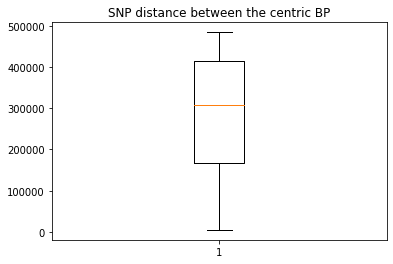

In [377]:
plt.boxplot(check.range)
plt.title('SNP distance between the centric BP')